# Part III: Analysing results and comparing algorithms

## Imports

In [62]:
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from numpy import std

## Functions

In [52]:
# Compute the accuracy given the predicted and true values.
# pred: DataFrame with predicted values
# true: DataFrame with true values
#
# Returns the accuracy.
def accuracy(pred, true):
    correct = 0
    n = len(pred)

    for p, t in zip(pred, true):
        if (p == t): correct = correct + 1

    return correct / n

# Compute the accuracies of each round.
# pred: DataFrame with predicted values
# true: DataFrame with true values
#
# Return:
# acc: list of accuracies of each round.
def all_accuracies(pred, true):
    acc = np.empty(pred.shape[0])

    for i in range(0, pred.shape[0]):
        acc[i] = accuracy(pred.iloc[i, :], true.iloc[i, :])
    return acc

## Loading the results

In [3]:
# Naïve Bayes
pred_rounds_bayes = pd.read_csv('pred_rounds_bayes.csv', index_col=0)
true_rounds_bayes = pd.read_csv('true_rounds_bayes.csv', index_col=0)

# Perceptron
pred_rounds_perceptron = pd.read_csv('pred_rounds_perceptron.csv', index_col=0)
true_rounds_perceptron = pd.read_csv('true_rounds_perceptron.csv', index_col=0)

# Decision tree
pred_rounds_dt = pd.read_csv('pred_rounds_dt.csv', index_col=0)
true_rounds_dt = pd.read_csv('true_rounds_dt.csv', index_col=0)

# 3NN
pred_rounds_3nn = pd.read_csv('pred_rounds_3nn.csv', index_col=0)
true_rounds_3nn = pd.read_csv('true_rounds_3nn.csv', index_col=0)

# 5NN
pred_rounds_5nn = pd.read_csv('pred_rounds_5nn.csv', index_col=0)
true_rounds_5nn = pd.read_csv('true_rounds_5nn.csv', index_col=0)

# 7NN
pred_rounds_7nn = pd.read_csv('pred_rounds_7nn.csv', index_col=0)
true_rounds_7nn = pd.read_csv('true_rounds_7nn.csv', index_col=0)

## Calculating accuracies

In [59]:
bayes = all_accuracies(pred_rounds_bayes, true_rounds_bayes)
perceptron = all_accuracies(pred_rounds_perceptron, true_rounds_perceptron)
dt = all_accuracies(pred_rounds_dt, true_rounds_dt)
_3nn = all_accuracies(pred_rounds_3nn, true_rounds_3nn)
_5nn = all_accuracies(pred_rounds_5nn, true_rounds_5nn)
_7nn = all_accuracies(pred_rounds_7nn, true_rounds_7nn)

# Changing print precision to 4 decimal points
np.set_printoptions(precision=4)

print("{0:14} {1}".format("Bayes", bayes))
print("{0:14} {1}".format("Perceptron", perceptron))
print("{0:14} {1}".format("Decision Tree", dt))
print("{0:14} {1}".format("3NN", _3nn))
print("{0:14} {1}".format("5NN", _5nn))
print("{0:14} {1}".format("7NN", _7nn))


Bayes          [0.7414 0.7586 0.7586 0.6724 0.7414 0.7069 0.6724 0.6897 0.6379 0.6724]
Perceptron     [0.9828 0.9828 0.9655 0.9483 0.9655 0.9828 0.931  0.9828 0.9138 0.9655]
Decision Tree  [0.8966 0.931  0.9655 0.9655 0.9138 0.9138 0.8793 0.9138 0.9138 0.9655]
3NN            [0.8621 0.8621 0.8793 0.8103 0.8966 0.8793 0.7931 0.931  0.8276 0.8793]
5NN            [0.8966 0.8448 0.8966 0.8276 0.9138 0.8793 0.7931 0.8448 0.8103 0.8966]
7NN            [0.8793 0.8793 0.8966 0.8621 0.8966 0.8621 0.7759 0.8621 0.8276 0.8621]


## Choosing the best round of each algorithm

In [60]:
bayes_max = max(range(len(bayes)), key=bayes.__getitem__)

perceptron_max = max(range(len(perceptron)), key=perceptron.__getitem__)

dt_max = max(range(len(dt)), key=dt.__getitem__)

_3nn_max = max(range(len(_3nn)), key=_3nn.__getitem__)

_5nn_max = max(range(len(_5nn)), key=_5nn.__getitem__)

_7nn_max = max(range(len(_7nn)), key=_7nn.__getitem__)

print("{0:14} {1:7.4f}".format("Bayes", bayes[bayes_max]))
print("{0:14} {1:7.4f}".format("Perceptron", perceptron[perceptron_max]))
print("{0:14} {1:7.4f}".format("Decision Tree", dt[dt_max]))
print("{0:14} {1:7.4f}".format("3NN", _3nn[_3nn_max]))
print("{0:14} {1:7.4f}".format("5NN", _5nn[_5nn_max]))
print("{0:14} {1:7.4f}".format("7NN", _7nn[_7nn_max]))

Bayes           0.7586
Perceptron      0.9828
Decision Tree   0.9655
3NN             0.9310
5NN             0.9138
7NN             0.8966


## Results

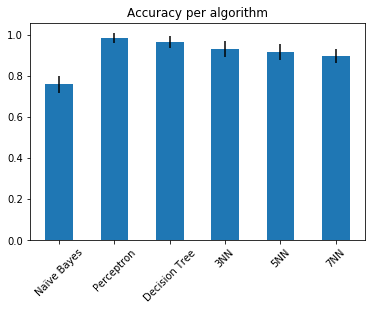

In [65]:
x = ['Naïve Bayes', 'Perceptron', 'Decision Tree', '3NN', '5NN', '7NN']
y = [bayes[bayes_max], perceptron[perceptron_max], dt[dt_max], _3nn[_3nn_max], _5nn[_5nn_max], _7nn[_7nn_max]]
results = [bayes, perceptron, dt, _3nn, _5nn, _7nn]

plt.bar(x, y, width=1/2, yerr=[std(results[i]) for i in range(0, 6)])
plt.xticks(rotation=45)
plt.title("Accuracy per algorithm")
plt.show()